In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

1. Collecte et Exploration des Données :
 - Charger le dataset et explorer ses caractéristiques.


In [235]:
data=pd.read_csv('Breast Cancer Wisconsin (Diagnostic) Data.csv')

In [236]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [237]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [238]:
data['diagnosis'].replace({'B':0,'M':1} , inplace=True)

In [239]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [240]:
data=data.drop(['Unnamed: 32','id'],axis=1)

In [241]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


 - Visualiser les relations entre les caractéristiques et les classes de tumeurs.


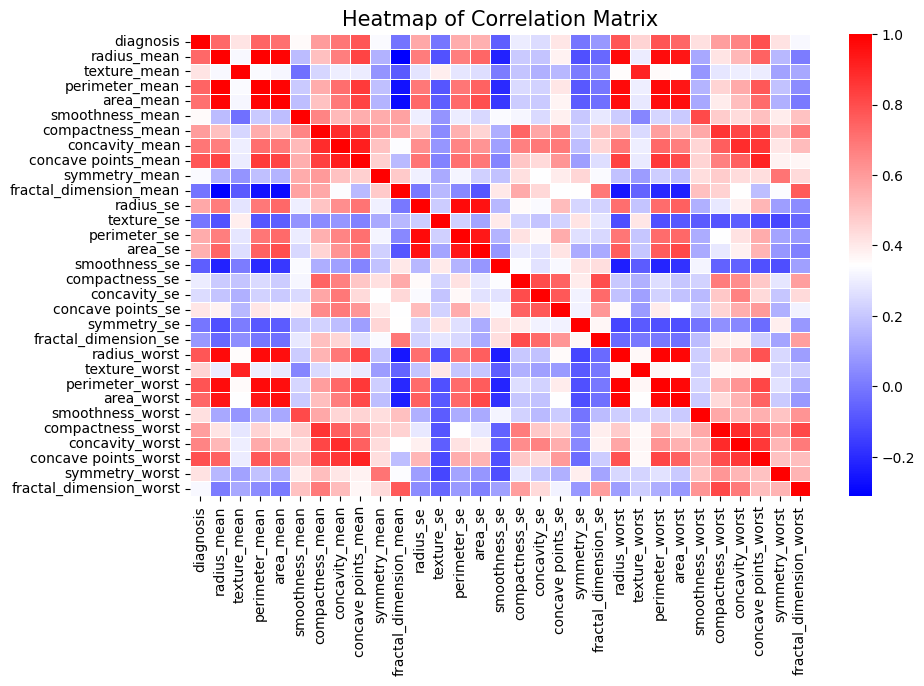

In [242]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,  cmap='bwr', linewidths=.5)

# Add title to the heatmap
plt.title('Heatmap of Correlation Matrix', fontsize=15)

# Display the plot
plt.show()


2. Prétraitement des Données :
 - Vérifier s'il y a des valeurs manquantes ou des valeurs aberrantes.


In [243]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [244]:
data.duplicated().sum()

0

 - Normaliser les données si nécessaire.

In [245]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X=data.drop('diagnosis',axis=1)
y=data['diagnosis']
x=sc.fit_transform(X)

In [246]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


3. Construction des Modèles :
 - Choix de différents algorithmes de classification tels que la regression logistique, les k-plus proches
voisins (KNN), les arbres de décision, ou les machines à vecteurs de support (SVM).


 - Division des données en ensembles d'entraînement et de test

In [247]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=30)


In [248]:
print(x_train)

[[ 0.38702849  0.15832236  0.4296536  ...  1.48449849  0.46308046
   0.99494572]
 [-0.32016686  0.3468148  -0.34842928 ... -0.78639625  0.47764049
  -1.08591823]
 [ 0.21093969 -0.60960979  0.27477845 ...  1.34136847  1.10695714
   1.24985848]
 ...
 [-1.24662117 -1.70333134 -1.26573504 ... -1.74506282  0.33042245
  -0.1349828 ]
 [ 0.2592221  -0.59332032  0.27848557 ... -0.1949952  -1.17087796
   0.08557215]
 [ 0.15981713 -1.23559085  0.25747857 ... -0.05795583 -0.11932056
   0.45076239]]


In [249]:
print(x_test)

[[ 1.12262526  0.59348391  1.04750661 ... -0.34710891 -0.86026408
  -1.01775677]
 [ 0.46087218 -0.01620767  0.62324754 ...  1.50581572  2.17469235
   1.16673475]
 [-1.15800874 -0.40948202 -1.1351621  ... -0.75548625 -0.01092926
  -0.40485783]
 ...
 [-1.24179292  2.0734986  -1.24761135 ... -1.00413659 -0.93791755
  -0.65589149]
 [-0.41389154 -0.46300456 -0.44151913 ... -0.89206883 -0.34419207
  -0.83488458]
 [ 0.7534068  -0.11394449  0.71386598 ...  0.49933764 -0.14682283
  -0.6464708 ]]


4. Entraînement des Modèles :
 - Entraînement des modèles sur l'ensemble d'entraînement.
 - Optimisation des hyperparamètres pour améliorer les performances des modèles.


In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC()

In [251]:
lr.fit(x_train,y_train)

LogisticRegression()

In [252]:
lr.score(x_test,y_test)

0.9824561403508771

In [253]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [254]:
dt.score(x_test,y_test)

0.9298245614035088

In [255]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [256]:
knn.score(x_test, y_test)

0.956140350877193

In [257]:
sv.fit(x_test,y_test)

SVC()

In [258]:
sv.score(x_test, y_test)

0.9912280701754386

5. Évaluation des Modèles :
    - Évaluation des performances des modèles sur l'ensemble de test à l'aide de mesures telles que la
        précision, le rappel, le score F1, etc.
    - Comparaison des performances des différents modèles

In [259]:
y_pred_lr=lr.predict(x_test)

In [260]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy=accuracy_score(y_test,y_pred_lr)
conf_matrix=confusion_matrix(y_test,y_pred_lr)
class_report= classification_report(y_test,y_pred_lr)
print(f"Accuracy :{accuracy*100:.2f}%")
print("Confusion Matrix :")
print(conf_matrix)
print("classification report :")
print(class_report)

Accuracy :98.25%
Confusion Matrix :
[[69  1]
 [ 1 43]]
classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        70
           1       0.98      0.98      0.98        44

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [261]:
y_pred_dt=dt.predict(x_test)

In [262]:
accuracy=accuracy_score(y_test,y_pred_dt)
conf_matrix=confusion_matrix(y_test,y_pred_dt)
class_report= classification_report(y_test,y_pred_dt)
print(f"Accuracy :{accuracy*100:.2f}%")
print("Confusion Matrix")
print(conf_matrix)
print("classification report")
print(class_report)

Accuracy :92.98%
Confusion Matrix
[[67  3]
 [ 5 39]]
classification report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        70
           1       0.93      0.89      0.91        44

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [263]:
y_pred_knn=knn.predict(x_test)

In [264]:
accuracy=accuracy_score(y_test,y_pred_knn)
conf_matrix=confusion_matrix(y_test,y_pred_knn)
class_report= classification_report(y_test,y_pred_knn)
print(f"Accuracy :{accuracy*100:.2f}%")
print("Confusion Matrix")
print(conf_matrix)
print("classification report")
print(class_report)

Accuracy :95.61%
Confusion Matrix
[[69  1]
 [ 4 40]]
classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        70
           1       0.98      0.91      0.94        44

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [265]:
y_pred_sv=sv.predict(x_test)

In [266]:
accuracy=accuracy_score(y_test,y_pred_sv)
conf_matrix=confusion_matrix(y_test,y_pred_sv)
class_report= classification_report(y_test,y_pred_sv)
print(f"Accuracy :{accuracy*100:.2f}%")
print("Confusion Matrix")
print(conf_matrix)
print("classification report")
print(class_report)

Accuracy :99.12%
Confusion Matrix
[[70  0]
 [ 1 43]]
classification report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        44

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



 6. Interprétation des Résultats :
- Analyse des caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein
selon les modèles développés.
- Identification des caractéristiques les plus importantes pour la classification des tumeurs


***Analyse des Caractéristiques Influentes :***

    Pour analyser les caractéristiques qui influent le plus sur la prédiction du diagnostic du cancer du sein selon les modèles développés, l'analyse des caractéristiques influentes peut varier.

**1. Régression Logistique:**

    Interprétation des Coefficients:

            Dans les modèles de régression linéaire ou logistique, les coefficients des variables peuvent indiquer l'importance relative de chaque caractéristique. Un coefficient élevé (positif ou négatif) suggère que la caractéristique a un impact significatif sur la prédiction.
            

In [267]:
featurenames = X.columns 
#Extraction des coefficients
coeff = lr.coef_[0]
feature_importance_lr = pd.DataFrame({'Feature': featurenames, 'Importance': coeff})
feature_importance_lr = feature_importance_lr.sort_values(by='Importance', ascending=False)

#Affichage des caractéristiques les plus importantes
print(feature_importance_lr)

                    Feature  Importance
10                radius_se    1.259918
21            texture_worst    1.103346
7       concave points_mean    0.986975
20             radius_worst    0.978735
23               area_worst    0.959518
28           symmetry_worst    0.955033
13                  area_se    0.953966
6            concavity_mean    0.894415
22          perimeter_worst    0.850123
26          concavity_worst    0.754990
27     concave points_worst    0.671612
24         smoothness_worst    0.639467
12             perimeter_se    0.620729
29  fractal_dimension_worst    0.578690
3                 area_mean    0.449550
0               radius_mean    0.396067
2            perimeter_mean    0.386031
1              texture_mean    0.366082
17        concave points_se    0.284561
14            smoothness_se    0.256738
4           smoothness_mean    0.148063
11               texture_se    0.004019
25        compactness_worst    0.002811
9    fractal_dimension_mean   -0.122141


**2.Arbre de Décision :**

In [268]:
importances = dt.feature_importances_
feature_importance_dt = pd.DataFrame({'Feature': featurenames, 'Importance': importances})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

#Affichage des caractéristiques les plus importantes
print(feature_importance_dt)

                    Feature  Importance
27     concave points_worst    0.728697
23               area_worst    0.142141
4           smoothness_mean    0.037157
13                  area_se    0.024088
15           compactness_se    0.016320
8             symmetry_mean    0.010223
21            texture_worst    0.009400
26          concavity_worst    0.009236
2            perimeter_mean    0.007078
20             radius_worst    0.007078
9    fractal_dimension_mean    0.006291
1              texture_mean    0.002292
24         smoothness_worst    0.000000
22          perimeter_worst    0.000000
18              symmetry_se    0.000000
25        compactness_worst    0.000000
28           symmetry_worst    0.000000
19     fractal_dimension_se    0.000000
0               radius_mean    0.000000
17        concave points_se    0.000000
16             concavity_se    0.000000
14            smoothness_se    0.000000
12             perimeter_se    0.000000
11               texture_se    0.000000


**3. Algorithme KNN**

In [269]:
from sklearn.inspection import permutation_importance


#Calcul de l'importance des caractéristiques par permutation
perm_importance = permutation_importance(knn, x_train, y_train)
feature_importance_knn = pd.DataFrame({'Feature': featurenames, 'Importance': perm_importance.importances_mean})
feature_importance_knn = feature_importance_knn.sort_values(by='Importance', ascending=False)

#Affichage des caractéristiques les plus importantes
print(feature_importance_knn)

                    Feature  Importance
21            texture_worst    0.008791
3                 area_mean    0.004835
14            smoothness_se    0.003956
10                radius_se    0.003956
9    fractal_dimension_mean    0.003516
23               area_worst    0.003516
25        compactness_worst    0.003516
20             radius_worst    0.003516
1              texture_mean    0.003077
22          perimeter_worst    0.002637
13                  area_se    0.002637
18              symmetry_se    0.002637
4           smoothness_mean    0.002637
2            perimeter_mean    0.002198
12             perimeter_se    0.001758
26          concavity_worst    0.001758
28           symmetry_worst    0.001758
0               radius_mean    0.001758
24         smoothness_worst    0.000879
29  fractal_dimension_worst    0.000879
16             concavity_se    0.000879
19     fractal_dimension_se    0.000440
6            concavity_mean    0.000440
8             symmetry_mean    0.000000


**4. Algorithme SVC**

In [270]:
#Calcul de l'importance des caractéristiques par permutation
perm_importance_svm = permutation_importance(sv, x_train, y_train)
feature_importance_svm = pd.DataFrame({'Feature': featurenames, 'Importance': perm_importance_svm.importances_mean})
feature_importance_svm = feature_importance_svm.sort_values(by='Importance', ascending=False)

#Affichage des caractéristiques les plus importantes
print(feature_importance_svm)

                    Feature  Importance
9    fractal_dimension_mean    0.011868
21            texture_worst    0.010549
26          concavity_worst    0.007473
27     concave points_worst    0.006154
3                 area_mean    0.005275
23               area_worst    0.005275
22          perimeter_worst    0.005275
20             radius_worst    0.005275
19     fractal_dimension_se    0.004835
0               radius_mean    0.003956
2            perimeter_mean    0.003956
1              texture_mean    0.003516
24         smoothness_worst    0.003077
28           symmetry_worst    0.002637
15           compactness_se    0.002637
13                  area_se    0.002637
16             concavity_se    0.002198
12             perimeter_se    0.001758
11               texture_se    0.001758
7       concave points_mean    0.001758
18              symmetry_se    0.001319
10                radius_se    0.000879
6            concavity_mean    0.000879
14            smoothness_se    0.000440


7. Déploiement et Utilisation :
- Création d'une interface utilisateur simple permettant à un médecin de saisir les mesures cliniques
d'une biopsie de tumeur mammaire et d'obtenir une prédiction sur son diagnostic.

In [271]:
models = {
    "logistic_regression": lr,
    "decision_tree": dt,
    "knn": knn,
    "svm": sv
}

In [272]:
for name, model in models.items():
    model.fit(x_train, y_train)
    pickle.dump(model, open(f'{name}.pkl', 'wb'))
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)